In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 3.5]

import utils
from add_fourier import get_fourier_fn

In [3]:
def read_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame.from_dict(data['data'])
    df.sort_values('lon', inplace=True)
    return df

$0.0048x+0.0040$ for Charon F555W
15.069415737825528
$0.0312x+0.0186$ for Pluto F555W
15.010044593202203
$-0.0000x+0.0494$ for Charon F435W
15.069415737825528
$-0.0000x+0.2288$ for Pluto F435W
15.010044593202203


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


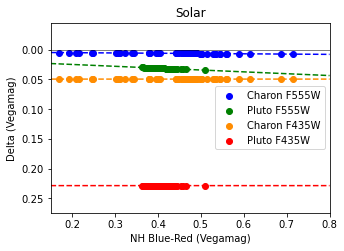

$-0.0665x-0.0857$ for Charon F555W
15.069415737825528
$-0.0369x-0.0889$ for Pluto F555W
15.010044593202203
$-0.0000x-0.1516$ for Charon F435W
15.069415737825528
$-0.0000x+0.0277$ for Pluto F435W
15.010044593202203


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


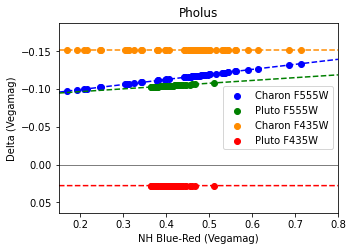

In [12]:
def col():
    colors = ['blue', 'green', 'darkorange', 'red']
    i = 0
    while True:
        yield colors[i%len(colors)]
        i += 1

getcol = col()

def show_spec_diff(data_file, spec):
    target, bandpass = data_file.split("_")
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    color = next(getcol)

    df = read_file(f"output/{data_file}.json")
    spec_df = read_file(f"output/{data_file}_{spec}.json")

    plot_x = df.converted_vegamag_NH_BLUE - df.converted_vegamag_NH_RED # B-V on x axis
    plot_y = df.multi_vegamag - spec_df.multi_vegamag # Delta on y axis
    
    plt.scatter(
        plot_x, plot_y,
        marker='o', c=color,
        label=f"{target} {bandpass}"
    )
    
    # Fits
    fit = np.polyfit(plot_x, plot_y, 1)
    print(f"${fit[0]:.4f}x{fit[1]:+.4f}$ for", target, bandpass)
    x = [0.15, 0.8]
    plt.plot(x, np.poly1d(fit)(x), '--', c=color)
    

def plt_save(spec):
    # line in middle of figure to emphasize importance of y=0
    plt.axhline(0, c='black', lw=0.5)
    
    plt.title(f"{spec.capitalize()}")
    plt.xlabel("NH Blue-Red (Vegamag)")
    plt.ylabel("Delta (Vegamag)")
    plt.gca().set_ymargin(0.2)
    plt.gca().set_xmargin(0.0)
    plt.gca().invert_yaxis()
    plt.legend(loc='center right')
    figname = f"{spec}_diff.eps"
    plt.savefig(f"figures/{figname}", bbox_inches='tight')
    plt.show()

    
show_spec_diff("charon_555", "solar")
show_spec_diff("pluto_555", "solar")
show_spec_diff("charon_435", "solar")
show_spec_diff("pluto_435", "solar")
plt_save("solar")
show_spec_diff("charon_555", "pholus")
show_spec_diff("pluto_555", "pholus")
show_spec_diff("charon_435", "pholus")
show_spec_diff("pluto_435", "pholus")
plt_save("pholus")